# 1 - Perkenalan

Nama : Muhamad Fandhi 

Batch : HCK - 003

Dataset : Bank Customer Churn Dataset

Objective : Creating a model for predicting whether Bank ABC's costumers will churn or not based on the customers' behaviors.

Dataset URL :
``
https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset
``

Deployment URL :
``
https://huggingface.co/spaces/mfandhi/milestone2
``

# 2 - Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from feature_engine.transformation import BoxCoxTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
import pickle
import warnings
warnings.simplefilter("ignore")

# 3 - Data Loading

Importing dataset csv file.

In [2]:
# Load Dataset

df_ori = pd.read_csv('h8dsft_Milestone2P1_muhamad-fandhi.csv')
df = df_ori.copy() # copying dataset
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
# Showing first 10 of dataset

df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
# Showing last 10 of dataset

df.tail(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9990,15798964,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,15657105,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,15569266,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
# Check Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
# Check Dataset 

df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Check Dataset

df.describe(include='O')

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


We want to check if there are missing values in our dataset.

In [8]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

We can see that there is no missing values in our data. Next, we want to see if there are duplicate entries in our data

In [9]:
df.duplicated().sum()

0

Here, we can see there are no duplicated data on our dataset. So we can continue to the next section.

# 4 - Exploratory Data Analysis (EDA)

In this section, we will explore about our dataset to get better understanding of the data.

In [10]:
# Showing data

df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


First, we will split the columns into numerical and categorical columns.

In [11]:
edanum_cols = ['credit_score','age', 'balance','estimated_salary']
edacat_cols = ['country','gender','tenure','products_number','credit_card','active_member','churn']

## Numerical Columns

Next, we want to see the distribution of our numerical columns.

Skewness of credit_score : -0.07160660820092675
Skewness of age : 1.0113202630234552
Skewness of balance : -0.14110871094154384
Skewness of estimated_salary : 0.0020853576615585162


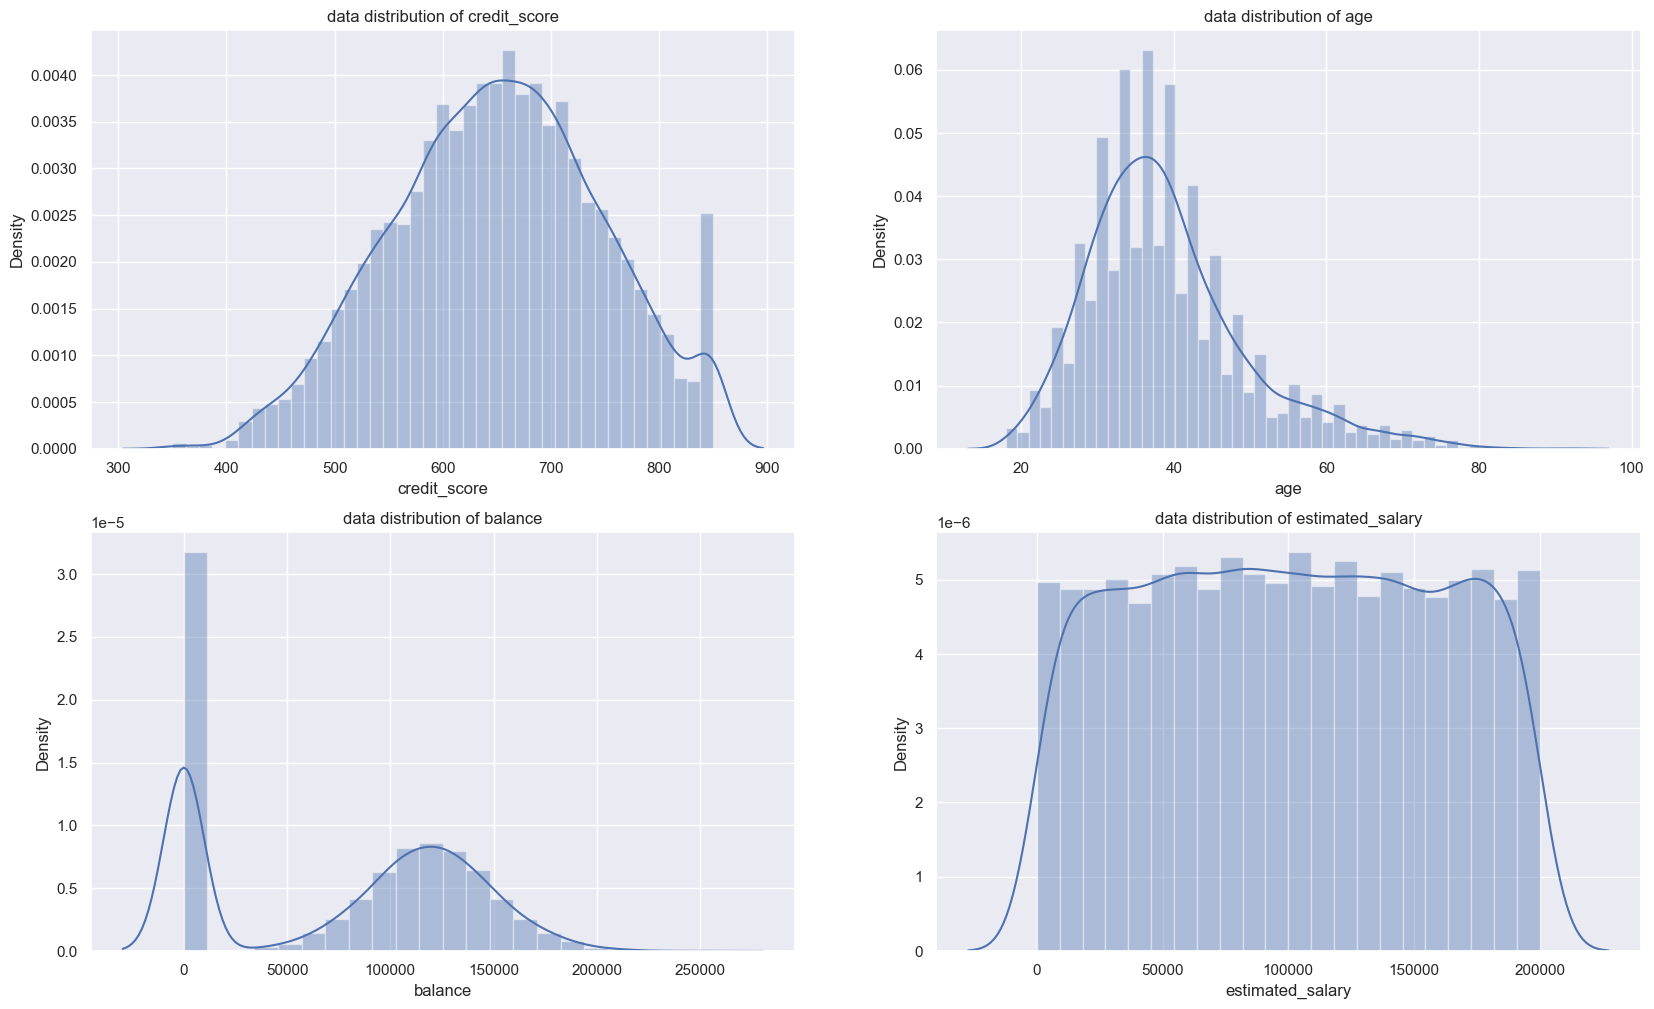

In [12]:
x = 1
plt.figure(figsize=(20,25))
sns.set(color_codes=True)
for col in edanum_cols:
    print(f'Skewness of {col} : {df[col].skew()}')
    plt.subplot(4,2,x)
    sns.distplot(df[col])
    plt.title(f'data distribution of {col}')
    x+=1

In [13]:
# Statistical overview of numerical columns

df[edanum_cols].describe()

,credit_score,age,balance,estimated_salary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881
std,96.653299,10.487806,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,51002.110000
50%,652.000000,37.000000,97198.540000,100193.915000
75%,718.000000,44.000000,127644.240000,149388.247500
max,850.000000,92.000000,250898.090000,199992.480000


Here, we have all of our numerical features data distributions and skewness value. We can see that the credit score data is normally distributed with max value is capped at 850. The age of our customers are mostly between 25 to 45 years old with the youngest customer is 18 years old and the oldest is 92 years old. We have a lot of customers that have 0 balance in their account, but the highest balance is around 250 K and the average balance of our customers is 76.5 K. This makes the distribution of the balance data is right skewed. We will transform the data later on preprocessing section. The last numerical column is estimated salary. In this column, we have almost a uniform data which is very well distributed.

## Categorical Columns

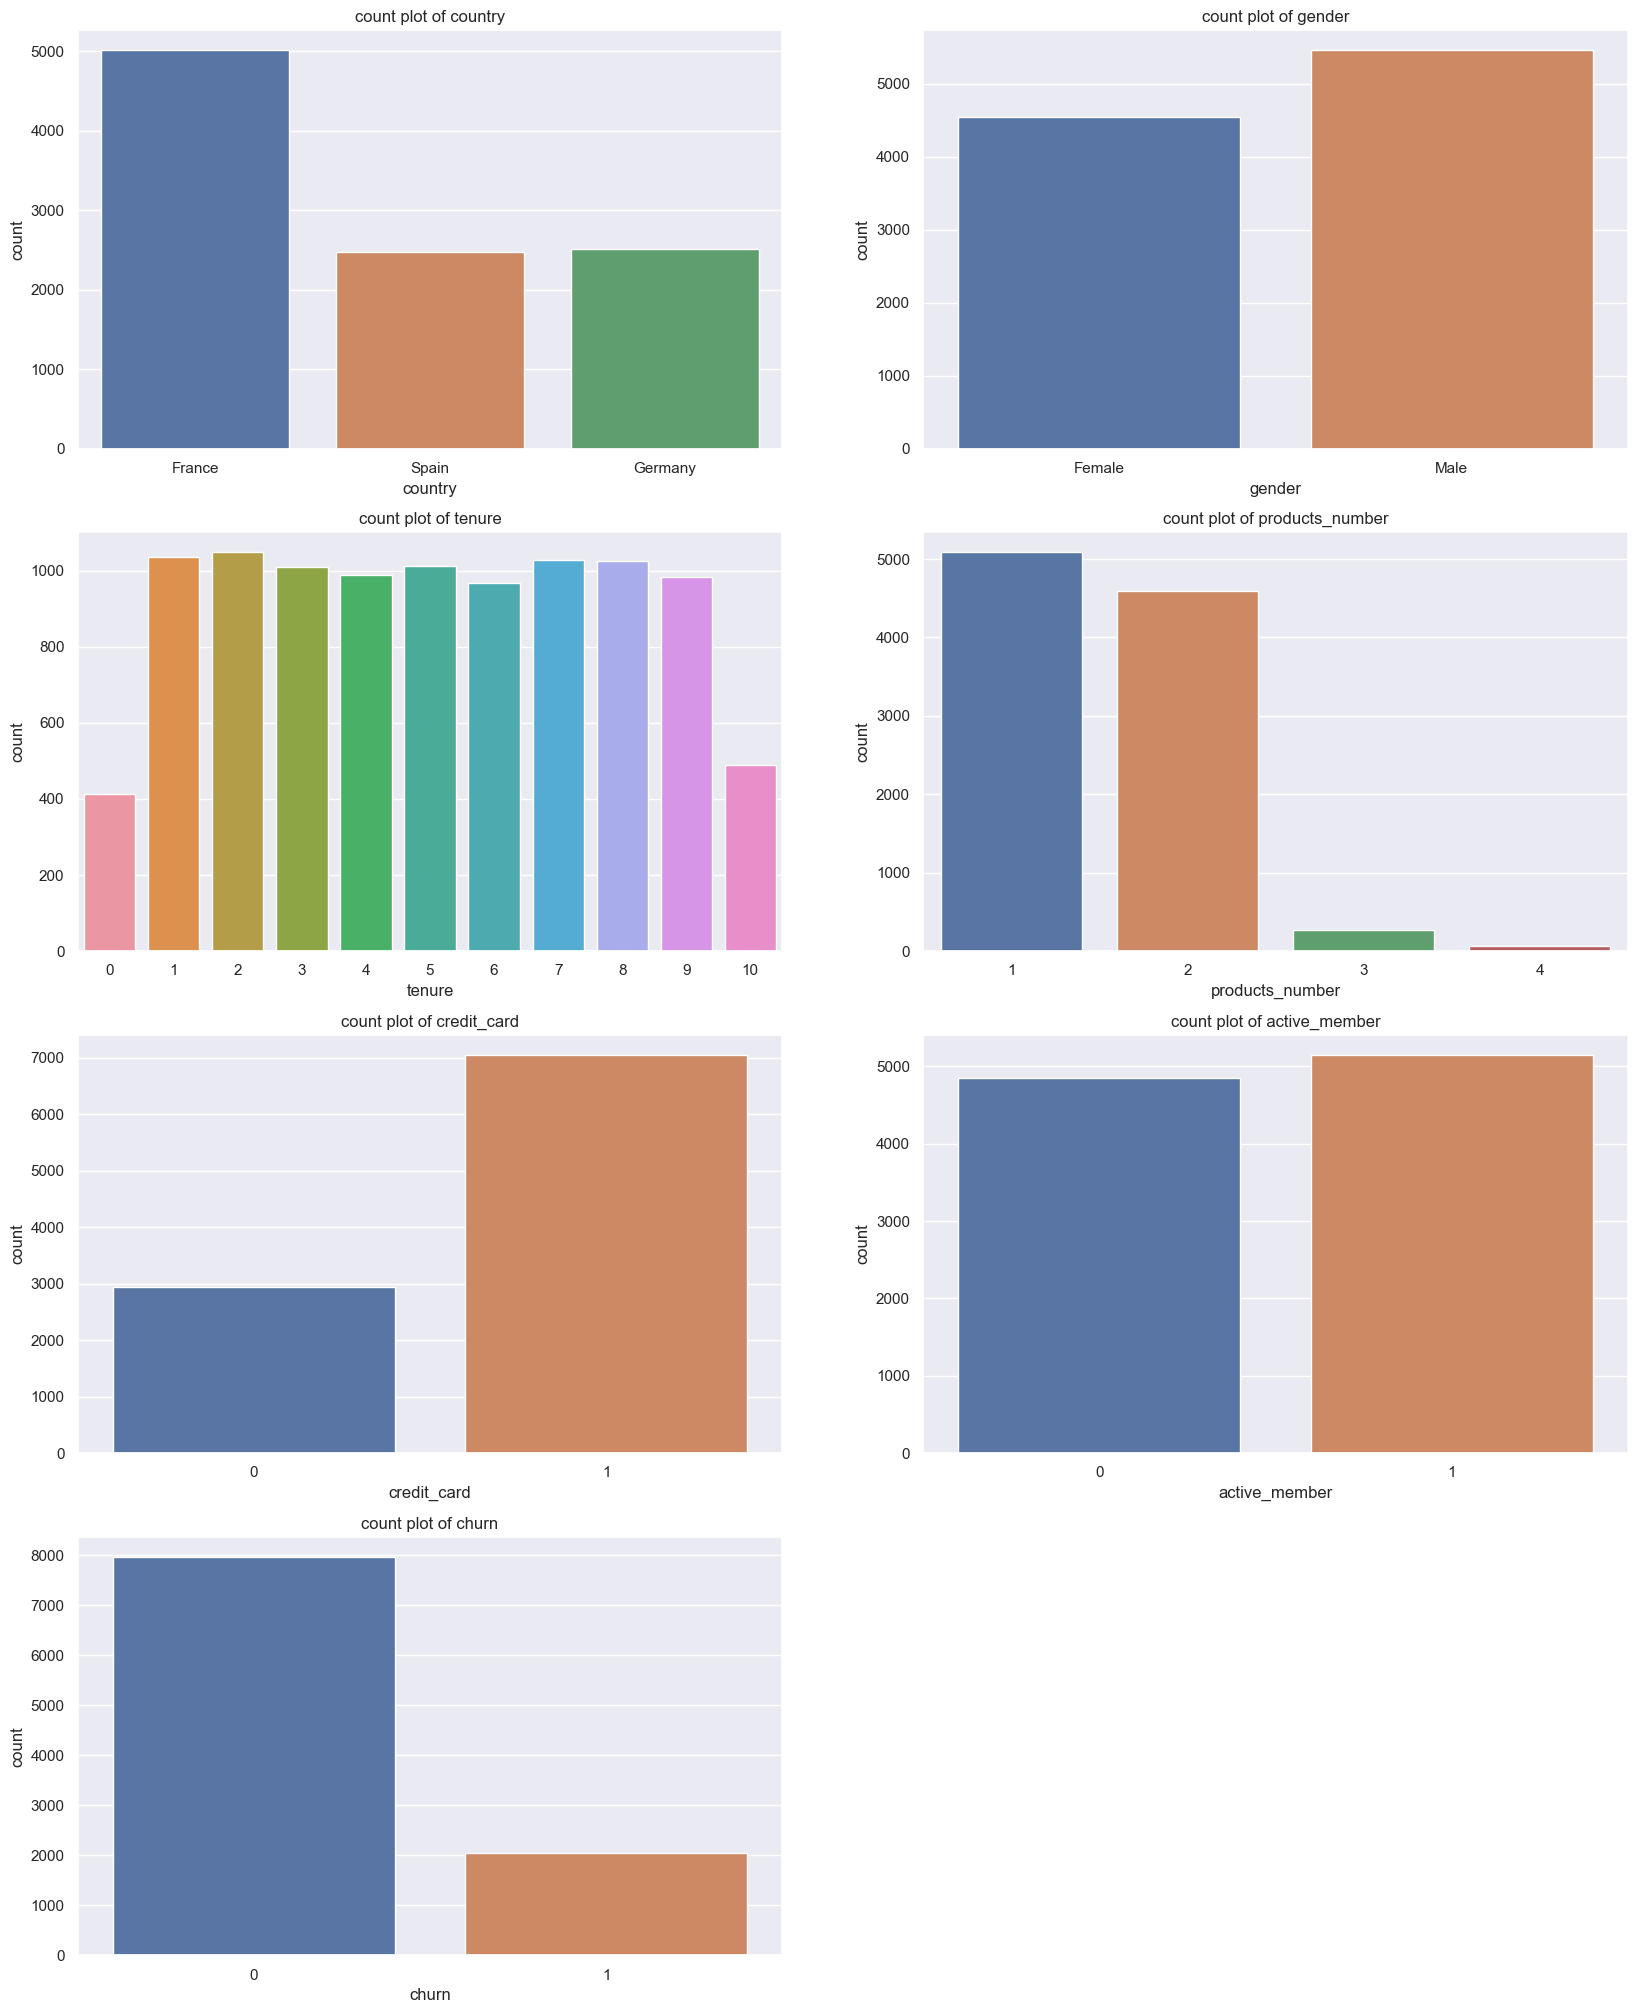

In [14]:
x = 1
plt.figure(figsize=(20,25))
sns.set(color_codes=True)
for col in edacat_cols:
    plt.subplot(4,2,x)
    sns.countplot(df[col])
    plt.title(f'count plot of {col}')
    x+=1

Here, we have all of our categorical features data value counts. We can see that the country of our data is dominated by France. The Spain and Germany have about the same data counts. Our men customers are a bit more than women customers. For the tenure column, we can see that the count is pretty well distributed with data between 0 and 10. For the product numbers, the data is dominated by products 1 and 2 but for products 3 and 4 the count is very low. For the credit card count, most of our customers uses credit card, almost twice the customers that dont use credit card. Our customers are pretty balanced between the active and non active customers. For the target column (churn), we can see that the data is very imbalanced with customers that churn is only about 20 percent of all our customers.

## Target Analysis

### Against Numerical Columns

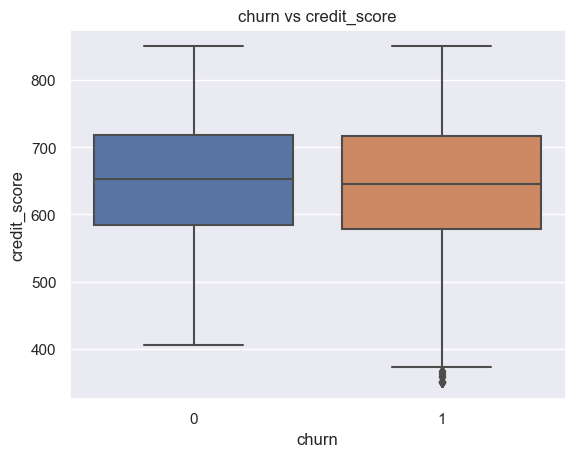

In [15]:
sns.boxplot(x='churn',y='credit_score',data=df);
plt.title('churn vs credit_score');

Here, we can see that there are no significance difference between credit score for churn customers and non customers.

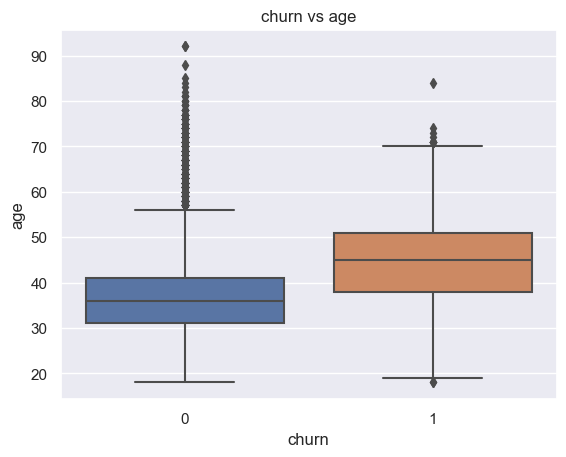

In [16]:
sns.boxplot(x='churn',y='age',data=df);
plt.title('churn vs age');

Here, we can see that older customers are more likely to churn.

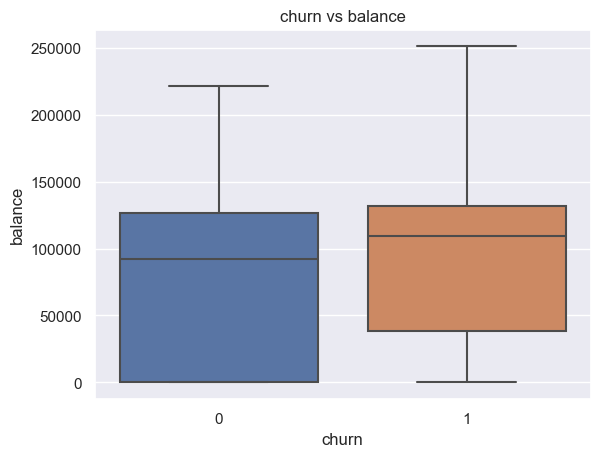

In [17]:
sns.boxplot(x='churn',y='balance',data=df);
plt.title('churn vs balance');

Here, we can see the slight difference that customers with lower balance are more likely to not churn.

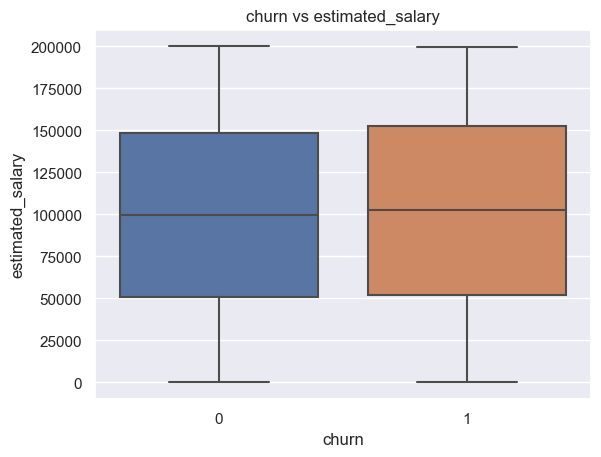

In [18]:
sns.boxplot(x='churn',y='estimated_salary',data=df);
plt.title('churn vs estimated_salary');

Here, we can see that there are no significance connection for the salary and churn of customers.

## Against Categorical Columns

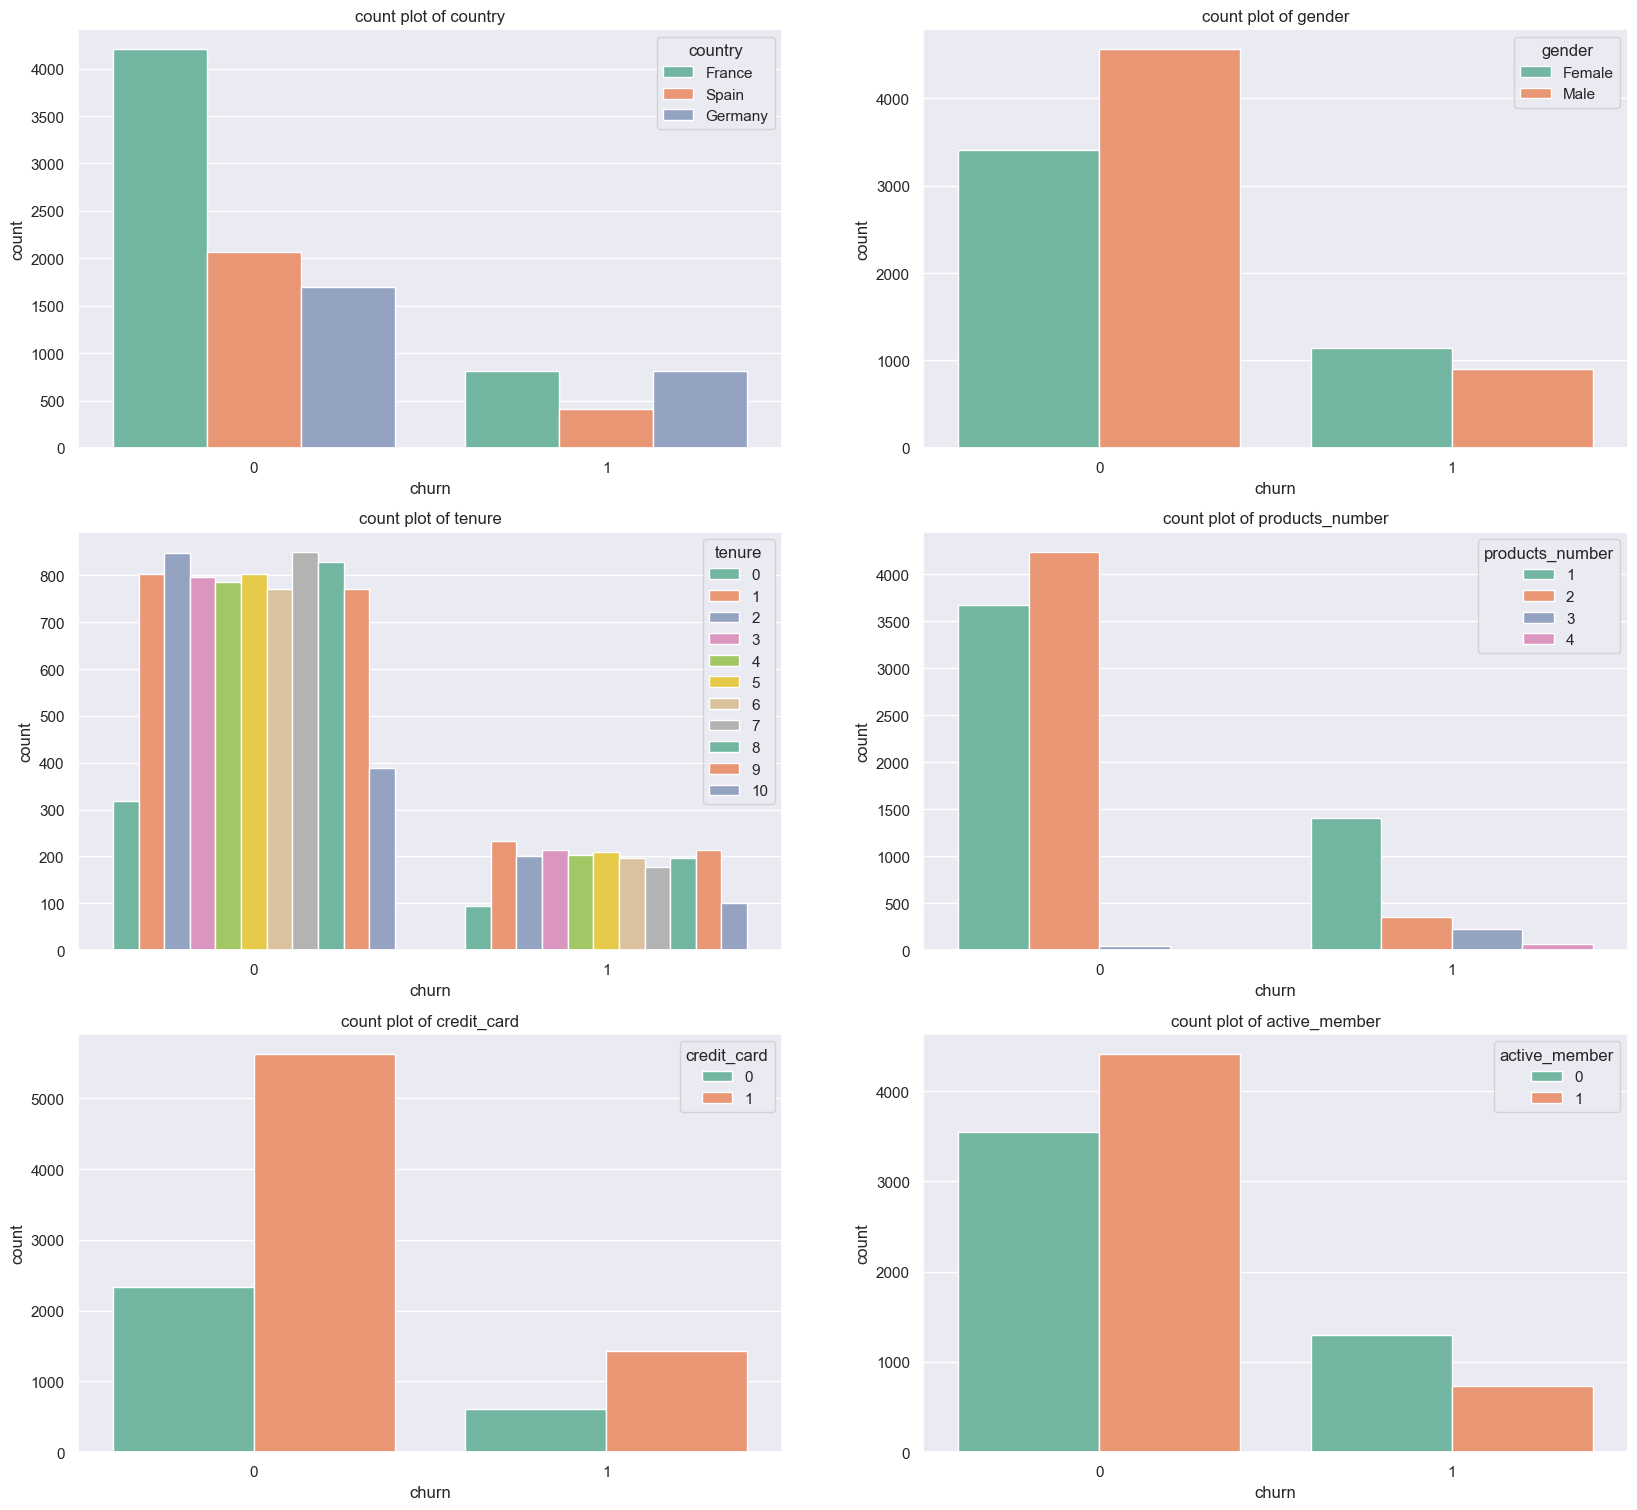

In [19]:
i = 1
plt.figure(figsize=(20,25))
sns.set(color_codes=True)
for col in edacat_cols[:6]:
    plt.subplot(4,2,i)
    sns.countplot(x='churn',hue=col,palette='Set2',data=df)
    plt.title(f'count plot of {col}')
    i+=1

Here, we can see for France customers that have high counts, have a low number of churn. For the gender columns, the men and women are quite balanced for the churn rate. For products number 2, despite having a lot of data, it does not have a high churn customers. For the active member, despite having more counts, the churn customers is lower than the non active customers. For the other columns the data are quite well distributed.

# 5 - Data Preprocessing

In this section we will process the data before we go into the modelling section.

## Feature Selection

For selecting the features we will calculate the correlation for each features against the target which is churn. We will do the calculation using phik correlation since it can calculate for both categorical and numerical features in one go.

In [20]:
phik_cor = df.phik_matrix().churn

interval columns not set, guessing: ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


In [21]:
phik_cor.sort_values(ascending=False)

churn               1.000000
products_number     0.565084
age                 0.487524
active_member       0.241939
balance             0.183365
gender              0.165422
country             0.104511
credit_score        0.096525
customer_id         0.029595
tenure              0.022895
credit_card         0.000000
estimated_salary    0.000000
Name: churn, dtype: float64

Here, we will set the threshold for the features to be chosen at 0.1 phik score. From the calculation we get 6 features that will be used for modelling. These features are products number, age, active member, balance, gender, and country. So for the train test set we will use these 6 feature columns and 1 target column (churn).

In [22]:
col = ['products_number','age','active_member','balance','gender','country','churn']

In [23]:
# New dataframe variable for modelling

data_train_test = df[col]
data_train_test

,products_number,age,active_member,balance,gender,country,churn
0,1,42,1,0.00,Female,France,1
1,1,41,1,83807.86,Female,Spain,0
2,3,42,0,159660.80,Female,France,1
3,2,39,0,0.00,Female,France,0
4,1,43,1,125510.82,Female,Spain,0
...,...,...,...,...,...,...,...
9995,2,39,0,0.00,Male,France,0
9996,1,35,1,57369.61,Male,France,0
9997,1,36,1,0.00,Female,France,1
9998,2,42,0,75075.31,Male,Germany,1


## Splitting Dataset

Next step is splitting the dataset into X (features) and y (target).

In [24]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('churn', axis=1)
y = data_train_test['churn']
X

,products_number,age,active_member,balance,gender,country
0,1,42,1,0.00,Female,France
1,1,41,1,83807.86,Female,Spain
2,3,42,0,159660.80,Female,France
3,2,39,0,0.00,Female,France
4,1,43,1,125510.82,Female,Spain
...,...,...,...,...,...,...
9995,2,39,0,0.00,Male,France
9996,1,35,1,57369.61,Male,France
9997,1,36,1,0.00,Female,France
9998,2,42,0,75075.31,Male,Germany


Next, we want to split each X and y data into train and test data. We set the train data 80% from data total so we have enough data for model training.

In [25]:
# Split between Train-Set and Test-Set
# Stratify y to balance the target value in each split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (8000, 6)
Test Size  :  (2000, 6)


Now that we have split the data into x_train, x_test, y_train, and y_test, we can proceed to the next section.

## Handling Missing Values

Next, we will check whether there are missing values in our data.

In [26]:
# Check Missing Values on X_train

X_train.isnull().sum()

products_number    0
age                0
active_member      0
balance            0
gender             0
country            0
dtype: int64

In [27]:
# Check Missing Values on y_train

y_train.isnull().sum()

0

In [28]:
# Check Missing Values on X_test

X_test.isnull().sum()

products_number    0
age                0
active_member      0
balance            0
gender             0
country            0
dtype: int64

In [29]:
# Check Missing Values on y_test

y_test.isnull().sum()

0

## Column Transforming

In this section we will create a pipeline for transforming the data. First, we will create a pipeline for transforming our numerical features. This pipeline will transform our age column using boxcox transformer and then transform age and balance column with standard scaler. Standard scaler is used because our data is normally distributed. Next, we will encode the categorical features gender and country using Oridnal Encoder. Since products number and active member columns are already encoded we will not do anything to these columns so we will set the parameter remainder='passthrough for the column transformer.

In [30]:
# numerical features tansformer
numeric_features = ['age','balance']
numeric_transformer = Pipeline(
    steps=[('boxcox', BoxCoxTransformer(variables = ['age'])), ("scaler", StandardScaler())]
)

# categorical features transformer
ordinal_features = ['gender','country']
ord_transformer = OrdinalEncoder() 

# columns that are already encoded
other_columns = ['products_number', 'active_member']

# defining the columns transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("ord",ord_transformer,ordinal_features)
    ], remainder='passthrough' # parameter for leaving the other columns untouched
)

In [31]:
# transforming the X_train and X_test

X_train_final = preprocessor.fit_transform(X_train)     # fit only on train data
X_test_final = preprocessor.transform(X_test)

In [32]:
# showing transformed features

X_train_final

array([[-1.00738341, -1.21889346,  0.        ,  0.        ,  2.        ,
         1.        ],
       [-0.14408878,  0.01661087,  0.        ,  1.        ,  1.        ,
         0.        ],
       [ 0.44716303,  0.19366477,  0.        ,  1.        ,  2.        ,
         0.        ],
       ...,
       [-0.03755187, -1.21889346,  1.        ,  0.        ,  2.        ,
         1.        ],
       [-0.73678835, -1.21889346,  0.        ,  0.        ,  2.        ,
         1.        ],
       [ 0.35603189, -1.21889346,  1.        ,  0.        ,  2.        ,
         1.        ]])

In [33]:
# Putting the transformed data inside dataframe

X_train_final_df = pd.DataFrame(X_train_final,columns=numeric_features+ordinal_features+other_columns)
X_train_final_df

,age,balance,gender,country,products_number,active_member
0,-1.007383,-1.218893,0.0,0.0,2.0,1.0
1,-0.144089,0.016611,0.0,1.0,1.0,0.0
2,0.447163,0.193665,0.0,1.0,2.0,0.0
3,0.943621,-1.218893,0.0,0.0,1.0,0.0
4,-0.144089,-1.218893,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
7995,-1.007383,-1.218893,1.0,0.0,2.0,0.0
7996,-0.736788,1.086674,0.0,0.0,2.0,1.0
7997,-0.037552,-1.218893,1.0,0.0,2.0,1.0
7998,-0.736788,-1.218893,0.0,0.0,2.0,1.0


## VIF

Before we continue to model definition, we want to know if all the features selected don't have multi-colinearity. Since VIF can only be calculated for numerical columns, we calculate the vif after we have all our data ready for modelling (scaled and encoded). First we define a function for calculating each vif and putting it in a dataframe of vif. And then, we use the function to show the VIF value for each features.

In [34]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns.to_list()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(X_train_final_df)

,variables,VIF
0,age,1.006001
1,balance,1.051330
2,gender,1.954655
3,country,1.717760
4,products_number,3.037607
5,active_member,1.876803


Here, we can see that all features have lower than 5 VIF value and we can say that our features doe't have multi-colinearity. Now that we have transformed the data and checked the multi colinearity, we can continue to our next section, Model Definition.

## Imbalance Target Label Handling

In [35]:
y_train.value_counts()

0    6370
1    1630
Name: churn, dtype: int64

In [36]:
1630/len(y_train)

0.20375

From the EDA we saw that our target label is quite imbalanced. So we will handle the imbalance data using ADASYN library.

In [37]:
from imblearn.over_sampling import ADASYN

# Initialize the ADASYN oversampler
adasyn = ADASYN(sampling_strategy=0.95, random_state=61,n_neighbors=6)

# Oversample the dataset
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train_final, y_train)
y_train_balanced.value_counts()

1    6411
0    6370
Name: churn, dtype: int64

Now that our model class are already balanced, we will continue to modelling section.

# 6 - Model Definition

In this assignment, we will use baseline of 8 algorithm and will compare them using cross validation method. These algorithm are decision tree, random forest, adaboost, gradient boosting, logistic regression, svm classifier, knn, and naive bayes. We will select the best 5 algorithms to be tuned further. The metric that will be focused for comparing these models is Recall. Because we want the model to identify as many customers who will churn as possible. This means that we want to minimize the number of false negatives, or customers who are predicted to not churn but actually do. This is important when the cost of losing a customer is high. If our bank loses a valuable customer and the model did not predict it, it would be considered a loss for our bank. So, in simpler words, when the focus is on recall, the goal is to make sure that the model is correctly identifying most of the customers who are actually leaving and our bank is not losing valuable customers without knowing it.

In [38]:
# Defining Decision Tree Classifier Model
dt_model = DecisionTreeClassifier(random_state=69)
# Defining Random Forest Classifier Model
rf_model = RandomForestClassifier(random_state=69)
# Defining AdaBoost Classifier Model
ada_model = AdaBoostClassifier(random_state=69)
# Defining Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=69)
# Defining Logistic Regression Model
log_model = LogisticRegression()
# Defining SVM Classifier Model
svm_model = SVC()
# Defining KNN Classifier Model
knn_model = KNeighborsClassifier()
# Defining Naive Bayes Model
nb_model = GaussianNB()

# 7 - Cross Validation

In this section we compare the 8 models using cross validation technique and find the best model with the highest recall score.

In [39]:
# Setting skfold value for cv number of splits 
skfold=StratifiedKFold(n_splits=10,random_state=69,shuffle=True)

# checking cross validation score
cv_dt_model = cross_val_score(dt_model, X_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_rf_model = cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(ada_model, X_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_gb_model = cross_val_score(gb_model, X_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_log_model = cross_val_score(log_model, X_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(svm_model, X_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(knn_model, X_train_balanced, y_train_balanced, cv=skfold, scoring="recall")
cv_nb_model = cross_val_score(nb_model, X_train_balanced, y_train_balanced, cv=skfold, scoring="recall")

name_model = []
cv_scores=0
for cv,name in zip([cv_dt_model,cv_rf_model,cv_ada_model,cv_gb_model,cv_log_model,cv_knn_model,cv_nb_model],['dt_model','rf_model','ada_model','gb_model','log_model','knn_model','nb_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

dt_model
recall - All - Cross Validation  :  [0.83800623 0.80031201 0.81435257 0.80967239 0.8049922  0.83151326
 0.84555382 0.81123245 0.81591264 0.79407176]
recall - Mean - Cross Validation :  0.8165619335053776
recall - Std - Cross Validation  :  0.015839280984620507
recall - Range of Test-Set       :  0.8007226525207571 - 0.8324012144899982
--------------------------------------------------
rf_model
recall - All - Cross Validation  :  [0.85825545 0.8299532  0.83151326 0.83151326 0.84711388 0.84399376
 0.86115445 0.83151326 0.83775351 0.86895476]
recall - Mean - Cross Validation :  0.8441718790246936
recall - Std - Cross Validation  :  0.013541495639979185
recall - Range of Test-Set       :  0.8306303833847144 - 0.8577133746646728
--------------------------------------------------
ada_model
recall - All - Cross Validation  :  [0.75545171 0.71450858 0.75663027 0.70670827 0.73322933 0.70046802
 0.74726989 0.71606864 0.73478939 0.70046802]
recall - Mean - Cross Validation :  0.726559211

Our cross validation comparison results the best model is knn_model or K-Nearest Neighbors model with the mean of recall is 0.84. We can also see the complete result and found that the other 4 best model after random forest are decision tree, random forest, adaboost, and gradient boosting. After we get these best 5 models, we will tune these models and select the best one out of five.

# 8 - Parameter Tuning

## Decision Tree Classifier

In this section we will tune the hyperparameter for our Decision Tree Classifier model. We will search the best hyperparameter using RandomSearchCV. First, we define the randomizer for the RandomSearchCV and then we will fit the model to the training data to find the best hyperparameter.  

In [40]:
# Hyperparameter Tuning : Random Search

# Define Hyperparameters
random_grid_dt = {'max_depth': range(1, 10),
              'min_samples_split': range(2, 10),
              'criterion': ['gini', 'entropy']}
random_grid_dt

{'max_depth': range(1, 10),
 'min_samples_split': range(2, 10),
 'criterion': ['gini', 'entropy']}

Here, we can see the parameters that will be trialled randomly by our model. Next, we fit the train data using the parameters defined. 

In [41]:
# Train with Random Search

dt_randomcv = RandomizedSearchCV(estimator=dt_model, 
                                 param_distributions=random_grid_dt,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1, 
                                 scoring='recall')
dt_randomcv.fit(X_train_balanced, y_train_balanced)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=69),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'min_samples_split': range(2, 10)},
                   random_state=46, scoring='recall')

In [42]:
# Get Best Hyperparameters

dt_randomcv.best_params_

{'min_samples_split': 6, 'max_depth': 4, 'criterion': 'entropy'}

Here, we can see the best hyperparameter after using the RandomSearchCV and we will save the model with best parameter in a new variable.

In [43]:
# Get Best Estimator

dt_randomcv_best = dt_randomcv.best_estimator_
dt_randomcv_best

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=6,
                       random_state=69)

## Random Forest Classifier

In this section we will tune the hyperparameter for our Random Forest Classifier model. We search the best hyperparameter using RandomSearchCV. First, we define the randomizer for the RandomSearchCV and then we will fit the model to the training data to find the best hyperparameter.  

In [44]:
# Hyperparameter Tuning : Random Search

# Define Hyperparameters
random_grid_rf = {'n_estimators': range(50, 200),
              'max_depth': range(1, 10),
              'min_samples_split': range(2, 10),
              'criterion': ['gini', 'entropy']}
random_grid_rf

{'n_estimators': range(50, 200),
 'max_depth': range(1, 10),
 'min_samples_split': range(2, 10),
 'criterion': ['gini', 'entropy']}

Here, we can see the parameters that will be trialled randomly by our model. Next, we fit the train data using the parameters defined. 

In [45]:
# Train with Random Search

rf_randomcv = RandomizedSearchCV(estimator=rf_model, 
                                 param_distributions=random_grid_rf,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1, 
                                 scoring='recall')
rf_randomcv.fit(X_train_balanced, y_train_balanced)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=69),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': range(50, 200)},
                   random_state=46, scoring='recall')

In [46]:
# Get Best Hyperparameters

rf_randomcv.best_params_

{'n_estimators': 80,
 'min_samples_split': 5,
 'max_depth': 9,
 'criterion': 'entropy'}

Here, we can see the best hyperparameter after using the RandomSearchCV and we will save the model with best parameter in a new variable.

In [47]:
# Get Best Estimator

rf_randomcv_best = rf_randomcv.best_estimator_
rf_randomcv_best

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_split=5,
                       n_estimators=80, random_state=69)

## Adaboost Classifier

Next, we find the best hyperparameter for Adaboost classifier.

In [48]:
# Adaboost Classifier Hyperparameter Tuning : Random Search
from scipy.stats import uniform
# Define Hyperparameters
random_grid_ab = {'n_estimators': range(50, 200),
              'learning_rate': uniform(0, 1),
              'algorithm': ['SAMME', 'SAMME.R']}
random_grid_ab

{'n_estimators': range(50, 200),
 'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x29b27a94a60>,
 'algorithm': ['SAMME', 'SAMME.R']}

After creating the parameter to be searched we will train the model using random search cv.

In [49]:
# Train Adaboost Classifier with Random Search

ab_randomcv = RandomizedSearchCV(estimator=ada_model, 
                                 param_distributions=random_grid_ab,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1, 
                                 scoring='recall')
ab_randomcv.fit(X_train_balanced, y_train_balanced)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=69),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029B27A94A60>,
                                        'n_estimators': range(50, 200)},
                   random_state=46, scoring='recall')

In [50]:
# Get Best Hyperparameters

ab_randomcv.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.9634304149536288,
 'n_estimators': 196}

Here, we can see the best hyperparameter after using the RandomSearchCV and we will save the model with best parameter in a new variable.

In [51]:
# Get Best Estimator

ab_randomcv_best = ab_randomcv.best_estimator_
ab_randomcv_best

AdaBoostClassifier(learning_rate=0.9634304149536288, n_estimators=196,
                   random_state=69)

## Gradient Boosting Classifier

Next, we find the best hyperparameter for Gradient Boosting classifier.

In [52]:
# Gradient Boosting Classifier Hyperparameter Tuning : Random Search

# Define Hyperparameters
random_grid_gb = {'learning_rate': uniform(0, 1),
              'max_depth': range(1, 10),
              'n_estimators': range(50, 200)}
random_grid_gb

{'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x29b27aef730>,
 'max_depth': range(1, 10),
 'n_estimators': range(50, 200)}

After creating the parameter to be searched we will train the model using random search cv.

In [53]:
# Train Gradient Boosting Classifier with Random Search

gb_randomcv = RandomizedSearchCV(estimator=gb_model, 
                                 param_distributions=random_grid_gb,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1, 
                                 scoring='recall')
gb_randomcv.fit(X_train_balanced, y_train_balanced)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=69),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029B27AEF730>,
                                        'max_depth': range(1, 10),
                                        'n_estimators': range(50, 200)},
                   random_state=46, scoring='recall')

In [54]:
# Get Best Hyperparameters

gb_randomcv.best_params_

{'learning_rate': 0.5559807740145016, 'max_depth': 9, 'n_estimators': 130}

Here, we can see the best hyperparameter after using the RandomSearchCV and we will save the model with best parameter in a new variable.

In [55]:
# Get Best Estimator

gb_randomcv_best = gb_randomcv.best_estimator_
gb_randomcv_best

GradientBoostingClassifier(learning_rate=0.5559807740145016, max_depth=9,
                           n_estimators=130, random_state=69)

## K-Nearest Neighbors

Next, we find the best hyperparameter for K-Nearest Neighbors classifier.

In [56]:
# Gradient Boosting Classifier Hyperparameter Tuning : Random Search

# Define Hyperparameters
random_grid_knn = {'n_neighbors': np.arange(1, 51, 2),
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}
random_grid_knn

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39, 41, 43, 45, 47, 49]),
 'weights': ['uniform', 'distance'],
 'p': [1, 2]}

After creating the parameter to be searched we will train the model using random search cv.

In [57]:
# Train Gradient Boosting Classifier with Random Search

knn_randomcv = RandomizedSearchCV(estimator=knn_model, 
                                 param_distributions=random_grid_knn,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1, 
                                 scoring='recall')
knn_randomcv.fit(X_train_balanced, y_train_balanced)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=46, scoring='recall')

In [58]:
# Get Best Hyperparameters

knn_randomcv.best_params_

{'weights': 'distance', 'p': 2, 'n_neighbors': 17}

Here, we can see the best hyperparameter after using the RandomSearchCV and we will save the model with best parameter in a new variable.

In [59]:
# Get Best Estimator

knn_randomcv_best = knn_randomcv.best_estimator_
knn_randomcv_best

KNeighborsClassifier(n_neighbors=17, weights='distance')

# 9 - Model Evaluation

After searching for the best hyperparameters we will use the models to predict on train and test data and compare all of them.

## Decision Tree Classifier

Recall Score - Train Set   :  0.7916081734518796 

Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.64      0.69      6370
           1       0.69      0.79      0.74      6411

    accuracy                           0.72     12781
   macro avg       0.72      0.71      0.71     12781
weighted avg       0.72      0.72      0.71     12781
 

Confusion Matrix      : 


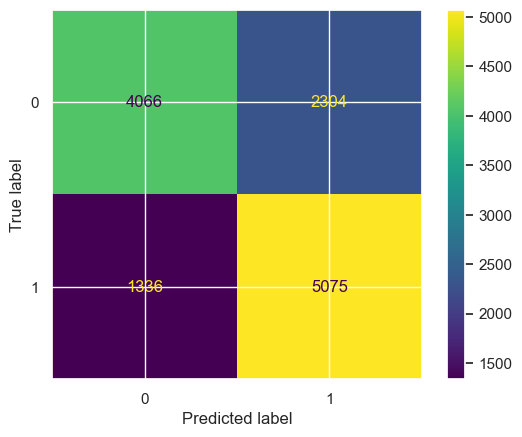

In [60]:
# Check Performance Model against Train-Set

y_pred_train_dt = dt_randomcv_best.predict(X_train_balanced)

print('Recall Score - Train Set   : ', recall_score(y_train_balanced, y_pred_train_dt), '\n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train_dt), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_randomcv_best, X_train_balanced, y_train_balanced))

Recall Score - Test Set   :  0.8378378378378378 

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.64      0.76      1593
           1       0.37      0.84      0.51       407

    accuracy                           0.68      2000
   macro avg       0.65      0.74      0.64      2000
weighted avg       0.82      0.68      0.71      2000
 

Confusion Matrix      : 


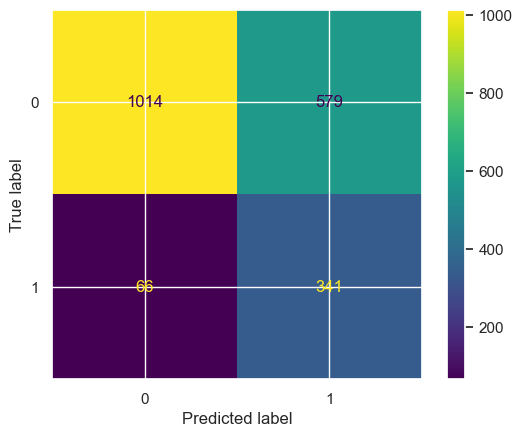

In [61]:
# Check Performance Model against Test-Set

y_pred_test_dt = dt_randomcv_best.predict(X_test_final)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_dt), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_dt), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_randomcv_best, X_test_final, y_test))

In [62]:
# Save Classification Report into a Dictionary
all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train_balanced, y_pred_train_dt),
    'train - recall' : recall_score(y_train_balanced, y_pred_train_dt),
    'train - accuracy' : accuracy_score(y_train_balanced, y_pred_train_dt),
    'train - f1_score' : f1_score(y_train_balanced, y_pred_train_dt),
    'test - precision' : precision_score(y_test, y_pred_test_dt),
    'test - recall' : recall_score(y_test, y_pred_test_dt),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_dt),
    'test - f1_score' : f1_score(y_test, y_pred_test_dt),
}
all_reports['Decision Tree'] = score_reports
pd.DataFrame(all_reports)

,Decision Tree
test - accuracy_score,0.677500
test - f1_score,0.513941
test - precision,0.370652
test - recall,0.837838
train - accuracy,0.715202
train - f1_score,0.736041
train - precision,0.687763
train - recall,0.791608


After we use the model with the best hyperparameter tuned and searched using RandomSearchCV, we use the model to predict on the train and test data. As stated before, we are focusing on the recall score for a specific reason. The tuned model achieved 0.79 recall score on the train data and 0.83 recall score on the test data.

## Random Forest Classifier

Recall Score - Train Set   :  0.8691311807830292 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      6370
           1       0.79      0.87      0.83      6411

    accuracy                           0.82     12781
   macro avg       0.82      0.82      0.82     12781
weighted avg       0.82      0.82      0.82     12781
 

Confusion Matrix      : 


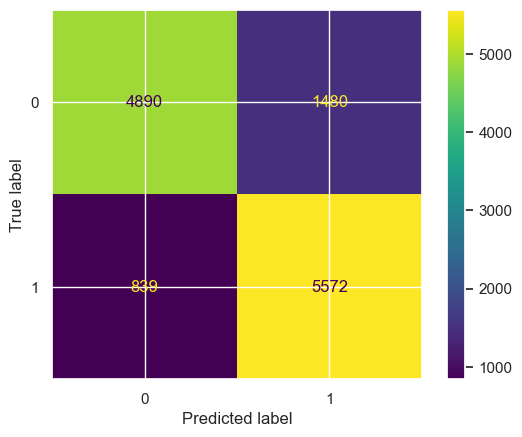

In [63]:
# Check Performance Model against Train-Set

y_pred_train_rf = rf_randomcv_best.predict(X_train_balanced)

print('Recall Score - Train Set   : ', recall_score(y_train_balanced, y_pred_train_rf), '\n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train_rf), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_train_balanced, y_train_balanced))

Recall Score - Test Set   :  0.7813267813267813 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.74      0.82      1593
           1       0.43      0.78      0.56       407

    accuracy                           0.75      2000
   macro avg       0.68      0.76      0.69      2000
weighted avg       0.83      0.75      0.77      2000
 

Confusion Matrix      : 


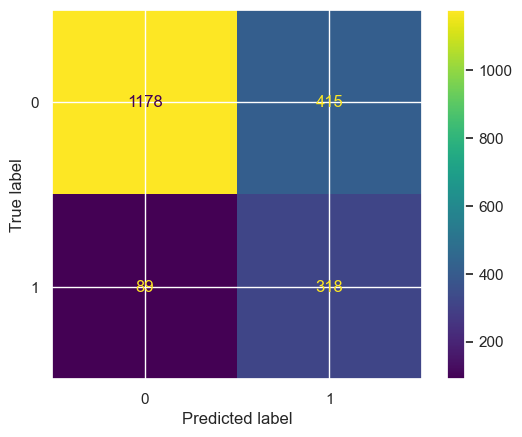

In [64]:
# Check Performance Model against Test-Set

y_pred_test_rf = rf_randomcv_best.predict(X_test_final)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_rf), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_rf), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_test_final, y_test))

In [65]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_balanced, y_pred_train_rf),
    'train - recall' : recall_score(y_train_balanced, y_pred_train_rf),
    'train - accuracy' : accuracy_score(y_train_balanced, y_pred_train_rf),
    'train - f1_score' : f1_score(y_train_balanced, y_pred_train_rf),
    'test - precision' : precision_score(y_test, y_pred_test_rf),
    'test - recall' : recall_score(y_test, y_pred_test_rf),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_rf),
    'test - f1_score' : f1_score(y_test, y_pred_test_rf),
}
all_reports['Random Forest'] = score_reports
pd.DataFrame(all_reports)

,Decision Tree,Random Forest
train - precision,0.687763,0.790130
train - recall,0.791608,0.869131
train - accuracy,0.715202,0.818559
train - f1_score,0.736041,0.827750
test - precision,0.370652,0.433834
test - recall,0.837838,0.781327
test - accuracy_score,0.677500,0.748000
test - f1_score,0.513941,0.557895


After we use the model with the best hyperparameter tuned and searched using RandomSearchCV, we use the model to predict on the train and test data. As stated before, we are focusing on the recall score for a specific reason. The tuned model achieved 0.86 recall score on the train data and 0.78 recall score on the test data.

## Adaboost Classifier

Recall Score - Train Set   :  0.7732023085322103 

Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.78      0.78      6370
           1       0.78      0.77      0.78      6411

    accuracy                           0.78     12781
   macro avg       0.78      0.78      0.78     12781
weighted avg       0.78      0.78      0.78     12781
 

Confusion Matrix      : 


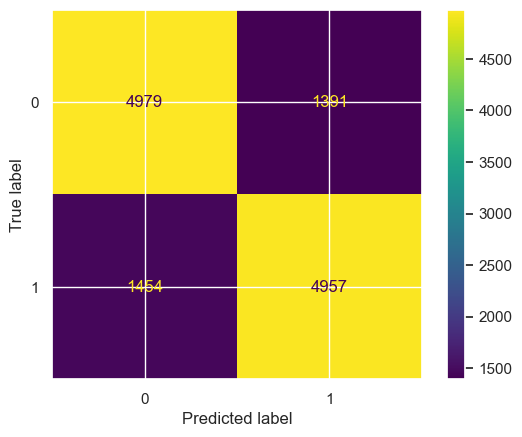

In [66]:
# Check Performance Model against Train-Set

y_pred_train_ab = ab_randomcv_best.predict(X_train_balanced)

print('Recall Score - Train Set   : ', recall_score(y_train_balanced, y_pred_train_ab), '\n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train_ab), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(ab_randomcv_best, X_train_balanced, y_train_balanced))

Recall Score - Test Set   :  0.7518427518427518 

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.76      0.84      1593
           1       0.45      0.75      0.56       407

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000
 

Confusion Matrix      : 


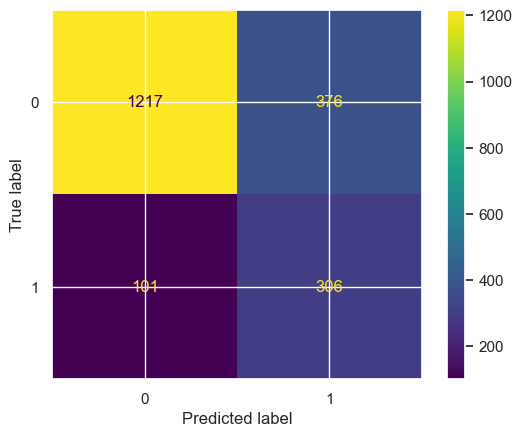

In [67]:
# Check Performance Model against Test-Set

y_pred_test_ab = ab_randomcv_best.predict(X_test_final)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_ab), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_ab), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(ab_randomcv_best, X_test_final, y_test))

In [68]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_balanced, y_pred_train_ab),
    'train - recall' : recall_score(y_train_balanced, y_pred_train_ab),
    'train - accuracy' : accuracy_score(y_train_balanced, y_pred_train_ab),
    'train - f1_score' : f1_score(y_train_balanced, y_pred_train_ab),
    'test - precision' : precision_score(y_test, y_pred_test_ab),
    'test - recall' : recall_score(y_test, y_pred_test_ab),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_ab),
    'test - f1_score' : f1_score(y_test, y_pred_test_ab),
}
all_reports['Adaboost Classifier'] = score_reports
pd.DataFrame(all_reports)

,Decision Tree,Random Forest,Adaboost Classifier
train - precision,0.687763,0.790130,0.780876
train - recall,0.791608,0.869131,0.773202
train - accuracy,0.715202,0.818559,0.777404
train - f1_score,0.736041,0.827750,0.777020
test - precision,0.370652,0.433834,0.448680
test - recall,0.837838,0.781327,0.751843
test - accuracy_score,0.677500,0.748000,0.761500
test - f1_score,0.513941,0.557895,0.561983


After we use the model with the best hyperparameter tuned and searched using RandomSearchCV, we use the model to predict on the train and test data. As stated before, we are focusing on the recall score for a specific reason. The tuned model achieved 0.77 recall score on the train data and 0.75 recall score on the test data.

## Gradient Boosting Classifier

Recall Score - Train Set   :  0.9789424426766495 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      6370
           1       0.99      0.98      0.98      6411

    accuracy                           0.98     12781
   macro avg       0.98      0.98      0.98     12781
weighted avg       0.98      0.98      0.98     12781
 

Confusion Matrix      : 


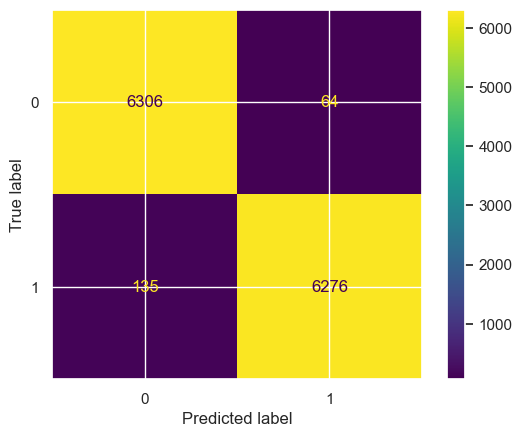

In [69]:
# Check Performance Model against Train-Set

y_pred_train_gb = gb_randomcv_best.predict(X_train_balanced)

print('Recall Score - Train Set   : ', recall_score(y_train_balanced, y_pred_train_gb), '\n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train_gb), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(gb_randomcv_best, X_train_balanced, y_train_balanced))

Recall Score - Test Set   :  0.5528255528255528 

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      1593
           1       0.57      0.55      0.56       407

    accuracy                           0.82      2000
   macro avg       0.73      0.72      0.73      2000
weighted avg       0.82      0.82      0.82      2000
 

Confusion Matrix      : 


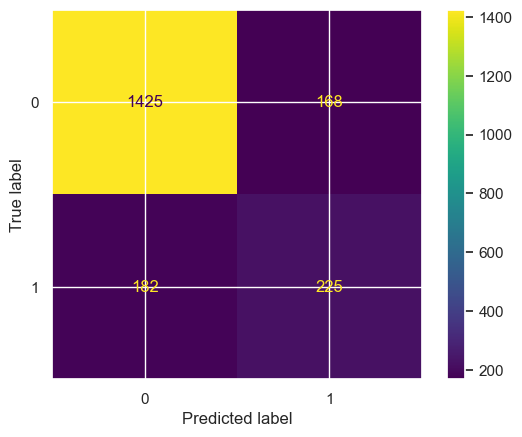

In [70]:
# Check Performance Model against Test-Set

y_pred_test_gb = gb_randomcv_best.predict(X_test_final)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_gb), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_gb), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(gb_randomcv_best, X_test_final, y_test))

In [71]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_balanced, y_pred_train_gb),
    'train - recall' : recall_score(y_train_balanced, y_pred_train_gb),
    'train - accuracy' : accuracy_score(y_train_balanced, y_pred_train_gb),
    'train - f1_score' : f1_score(y_train_balanced, y_pred_train_gb),
    'test - precision' : precision_score(y_test, y_pred_test_gb),
    'test - recall' : recall_score(y_test, y_pred_test_gb),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_gb),
    'test - f1_score' : f1_score(y_test, y_pred_test_gb),
}
all_reports['Gradient Boosting'] = score_reports
pd.DataFrame(all_reports)

,Decision Tree,Random Forest,Adaboost Classifier,Gradient Boosting
train - precision,0.687763,0.790130,0.780876,0.989905
train - recall,0.791608,0.869131,0.773202,0.978942
train - accuracy,0.715202,0.818559,0.777404,0.984430
train - f1_score,0.736041,0.827750,0.777020,0.984393
test - precision,0.370652,0.433834,0.448680,0.572519
test - recall,0.837838,0.781327,0.751843,0.552826
test - accuracy_score,0.677500,0.748000,0.761500,0.825000
test - f1_score,0.513941,0.557895,0.561983,0.562500


After we use the model with the best hyperparameter tuned and searched using RandomSearchCV, we use the model to predict on the train and test data. As stated before, we are focusing on the recall score for a specific reason. The tuned model achieved 0.97 recall score on the train data and 0.55 recall score on the test data.

## KNN

Recall Score - Train Set   :  0.9772266417095616 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      6370
           1       0.99      0.98      0.98      6411

    accuracy                           0.98     12781
   macro avg       0.98      0.98      0.98     12781
weighted avg       0.98      0.98      0.98     12781
 

Confusion Matrix      : 


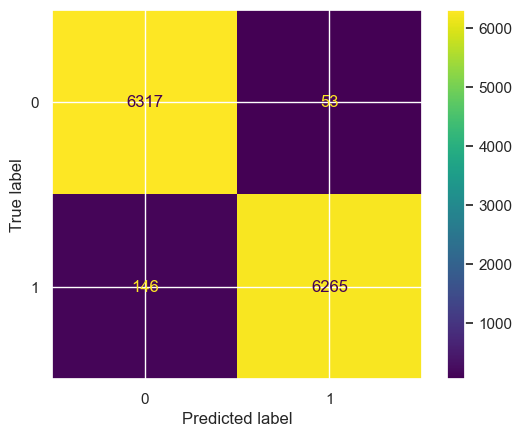

In [72]:
# Check Performance Model against Train-Set

y_pred_train_knn = knn_randomcv_best.predict(X_train_balanced)

print('Recall Score - Train Set   : ', recall_score(y_train_balanced, y_pred_train_knn), '\n')
print('Classification Report : \n', classification_report(y_train_balanced, y_pred_train_knn), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_randomcv_best, X_train_balanced, y_train_balanced))

Recall Score - Test Set   :  0.7076167076167076 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      1593
           1       0.45      0.71      0.55       407

    accuracy                           0.77      2000
   macro avg       0.68      0.74      0.70      2000
weighted avg       0.82      0.77      0.78      2000
 

Confusion Matrix      : 


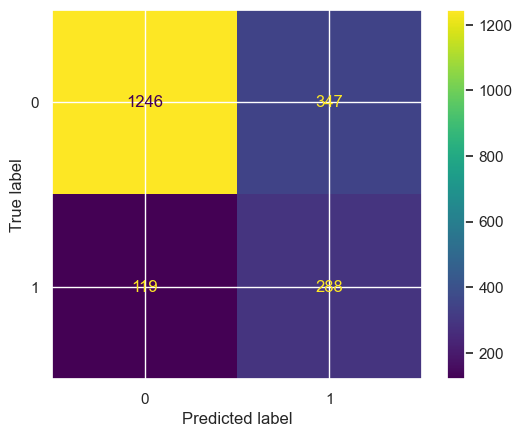

In [73]:
# Check Performance Model against Test-Set

y_pred_test_knn = knn_randomcv_best.predict(X_test_final)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_knn), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_knn), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_randomcv_best, X_test_final, y_test))

In [74]:
# Save Classification Report into a Dictionary

score_reports = {
    'train - precision' : precision_score(y_train_balanced, y_pred_train_knn),
    'train - recall' : recall_score(y_train_balanced, y_pred_train_knn),
    'train - accuracy' : accuracy_score(y_train_balanced, y_pred_train_knn),
    'train - f1_score' : f1_score(y_train_balanced, y_pred_train_knn),
    'test - precision' : precision_score(y_test, y_pred_test_knn),
    'test - recall' : recall_score(y_test, y_pred_test_knn),
    'test - accuracy_score' : accuracy_score(y_test, y_pred_test_knn),
    'test - f1_score' : f1_score(y_test, y_pred_test_knn),
}
all_reports['KNN'] = score_reports
pd.DataFrame(all_reports)

,Decision Tree,Random Forest,Adaboost Classifier,Gradient Boosting,KNN
train - precision,0.687763,0.790130,0.780876,0.989905,0.991611
train - recall,0.791608,0.869131,0.773202,0.978942,0.977227
train - accuracy,0.715202,0.818559,0.777404,0.984430,0.984430
train - f1_score,0.736041,0.827750,0.777020,0.984393,0.984366
test - precision,0.370652,0.433834,0.448680,0.572519,0.453543
test - recall,0.837838,0.781327,0.751843,0.552826,0.707617
test - accuracy_score,0.677500,0.748000,0.761500,0.825000,0.767000
test - f1_score,0.513941,0.557895,0.561983,0.562500,0.552783


After we use the model with the best hyperparameter tuned and searched using RandomSearchCV, we use the model to predict on the train and test data. As stated before, we are focusing on the recall score for a specific reason. The tuned model achieved 0.97 recall score on the train data and 0.70 recall score on the test data.

## Result

In [75]:
pd.DataFrame(all_reports)

,Decision Tree,Random Forest,Adaboost Classifier,Gradient Boosting,KNN
train - precision,0.687763,0.790130,0.780876,0.989905,0.991611
train - recall,0.791608,0.869131,0.773202,0.978942,0.977227
train - accuracy,0.715202,0.818559,0.777404,0.984430,0.984430
train - f1_score,0.736041,0.827750,0.777020,0.984393,0.984366
test - precision,0.370652,0.433834,0.448680,0.572519,0.453543
test - recall,0.837838,0.781327,0.751843,0.552826,0.707617
test - accuracy_score,0.677500,0.748000,0.761500,0.825000,0.767000
test - f1_score,0.513941,0.557895,0.561983,0.562500,0.552783


Here, we have all the score for 5 of our models. We can see the highest recall score on test data is achieved by the Decision Tree Classifier model with recall score 0.83. But, the recall score for Decision Tree on train data is 0.79 which is lower than the test score. For the other models, Random Forest, Gradient Boosting, and KNN results are highly overfit (high on train and low on test). For Adaboost Classifier, the score is 0.77 for train and 0.76 for test. Since the data is highly imbalanced, this score is relatively a good fit for this dataset. But if we compare all the test data recall score the highest is Decision Tree, followed by Random Forest, Adaboost, KNN, and the last Gradient Boosting. For the best model, we will choose Decision Tree with the highest recall score on test data.

# 10 - Conclusion

The metric that will be focused for comparing these models is Recall. Because we want the model to identify as many customers who will churn as possible. This means that we want to minimize the number of false negatives, or customers who are predicted to not churn but actually do. This is important when the cost of losing a customer is high. If our bank loses a valuable customer and the model did not predict it, it would be considered a loss for our bank. So, in simpler words, when the focus is on recall, the goal is to make sure that the model is correctly identifying most of the customers who are actually leaving and our bank is not losing valuable customers without knowing it.

Based on what we have done in this notebook, we can get some conclusion:

1. **The dataset is about customer churn in ABC Bank** with **imbalanced target classes** (minority class only 20% of all classes). 

2. In this model creation we are **focusing** our metrics on **recall score** because ideally, we want the model to identify as many customers who will churn as possible, so our optimal model will **minimize the False Negatives**  or customers who are **predicted to not churn but actually do**. So the best model will have **Recall score as high as possible**.

3. After comparing 8 baseline model (decision tree, random forest, adaboost, gradient boosting, logistic regression, svm classifier, knn, and naive bayes) using cross validation, we get the best 5 baseline model which is **K Nearest Neighbors** with **mean recall score 0.85** followed by 4 other models, decision tree, random forest, adaboost, and gradient boosting.

4. We used these 5 best model according to the cross validation comparison to be **tuned further using RandomSearchCV**.

5. We compared the 5 models and get **Decision Tree Classifier with the best results**. We get the highest recall score on train data 0.79 and **recall score on test data 0.83**.

# 11 - Further Improvement

There are several further improvement that can be done for this model.

1. Use different method for feature selection to be used for modelling.

2. Use different method for scaling and encoding the data before modelling.

3. Use different method for balancing the target label of the dataset.

4. Further hyperparameter tuning on models with more parameters to be tried.

5. Parameter tuning using other models other than the ones that are used in this notebook.


# 12 - Pipeline with Best Model

In [76]:
# Creating Pipeline for preprocessing and predicting using best model

clf = Pipeline(
    steps=[('preprocessor',preprocessor),('classifier',dt_randomcv_best)]
)

# 13 - Model Saving

In [77]:
# Model Saving

with open('model_pipe.pkl', 'wb') as file_1:
  pickle.dump(clf, file_1)